In [9]:
import requests
from bs4 import BeautifulSoup
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

from selenium.common.exceptions import NoSuchElementException, TimeoutException

## 플레이스토어 리뷰

In [100]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://play.google.com/store/apps/details?id=com.ringle&hl=ko&gl=US')

In [101]:
# 리뷰 모두 보기
driver.find_element(By.CSS_SELECTOR, 'main > div > div.W4P4ne > div.XnFhVd > div > span > span').click()

In [102]:
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 999999999999)")
    time.sleep(1)
scroll_down(driver)

In [103]:
html_src = driver.page_source
soup_src = BeautifulSoup(html_src, 'html.parser')

In [121]:
review_all = soup_src.select('#fcxH9b > div.WpDbMd > c-wiz:nth-child(4) > div > div.ZfcPIb > div > div > main > div > div.W4P4ne > div:nth-child(2) > div > div')

In [118]:
start = time.time() # 코드 실행 시간 측정을 위한 변수
date_ymd = [] # 리뷰등록일을 yyyymmdd 형태로 저장할 리스트 생성
date_y = []
date_m = []
date_d = []
username_list = [] # 사용자 닉네임 저장용 리스트
rating_list = [] # 평점 데이터 저장용 리스트
content_list = [] # 텍스트 리뷰 저장용 리스트

# 리뷰 1개씩 접근해 정보 추출
for rv in tqdm(review_all):
    date_ymd_v = rv.select_one('.p2TkOb').text
    date_y_v = date_ymd_v[0:4] # 연도 정보만 추출
    # 해당 단어가 등장한 인덱스 추출
    idx_y = date_ymd_v.find('년')
    idx_m = date_ymd_v.find('월')
    idx_d = date_ymd_v.find('일')
    date_m_v = str(int(date_ymd_v[idx_y+1:idx_m])) # 월 정보만 추출
    date_d_v = str(int(date_ymd_v[idx_m+1:idx_d])) # 일 정보만 추출
    
    # 월 정보가 1자리의 경우 앞에 0 붙여줌(e.g., 1월 -> 01월)
    if len(date_m_v) == 1:
        date_m_v = '0' + date_m_v
    # 일 정보가 1자리의 경우 앞에 0 붙여줌(e.g., 7일 -> 07일)
    if len(date_d_v) == 1:
        date_d_v = '0' + date_d_v
    
    # 리뷰등록일 full version은 최종적으로 yyyymmdd 형태로 저장
    date_full = date_y_v + date_m_v + date_d_v
    date_ymd.append(date_full)
    date_y.append(date_y_v)
    date_m.append(date_m_v)
    date_d.append(date_d_v)
    
    username_list.append(rv.select('.X43Kjb')[0].text) # 닉네임 정보 추출 및 저장
    rating_list.append(rv.select('span.nt2C1d > .pf5lIe > div')[0]['aria-label'][10]) # 평점 정보 추출 및 저장
    content = rv.select('span[jsname="fbQN7e"]')[0].text # 장문 리뷰 내용 추출 및 저장
    # 장문 리뷰 존재하는 경우 그대로 리스트에 저장
    if content:
        content_list.append(content)
    # 단문 리뷰만 존재하는 경우, 단문 리뷰 추출 및 저장
    else:
        content_list.append(rv.select('span[jsname="bN97Pc"]')[0].text)

  0%|          | 0/73 [00:00<?, ?it/s]

In [119]:
start = time.time() # 코드 실행 시간 측정을 위한 변수
rv_df = pd.DataFrame({'date': date_ymd, # 리뷰등록일 전체(yyyymmdd)
                      'date_y': date_y, # 리뷰등록일 중 연도(yyyy)
                      'date_m': date_m, # 리뷰등록일 중 월(mm)
                      'date_d': date_d, # 리뷰등록일 중 일(dd)
                     'username': username_list, # 사용자 닉네임
                     'rating': rating_list, # 평점
                     'content': content_list}) # 리뷰 내용

print(time.time() - start) # 코드 실행 소요시간 출력

0.0


In [120]:
rv_df

,date,date_y,date_m,date_d,username,rating,content
0,20220127,2022,01,27,Yun Cheol Lee,5,현재까지는 맘에 들어요. 다만 동영상 올리기 용량 좀 늘려주세요. 튜터들 영상이 왜...
1,20220220,2022,02,20,Ji-young Lee,5,항상 노력하는 자세에 감동합니다. 선생님들이 너무 자주 바뀌는건 좀 불만인데요 새로...
2,20220128,2022,01,28,KIM KIM,2,수강일자 남은 날 중에 딱 하루만 일정이 맞아서 신청했는데 튜터가 취소했네요...2...
3,20220127,2022,01,27,TJ Kim,1,"환불하는데 무슨 1:1 문의를 시키고, 30분이 넘도록 답장이 없나요. 별로네요."
4,20220114,2022,01,14,su-yeon Jun,4,애정하며 사용하는 영어 앱. 수준있는 컨텐츠와 글들 잘 읽고있어요
...,...,...,...,...,...,...,...
68,20180816,2018,08,16,여우애미,5,최고의 영어 선생님과 교재!
69,20161223,2016,12,23,SANGMIN HONG,5,최고의 영어 서비스
70,20170428,2017,04,28,Byung-Wan Kim,5,좋아요!!
71,20170824,2017,08,24,이현경,5,너무 좋아요


In [280]:
rv_df.to_csv('playstore.csv', index=False)

## 플레이스토어 리뷰 전처리
- 클렌징
- 토큰화

In [282]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import pandas as pd

In [292]:
df = pd.read_csv('playstore.csv')
df

,date,date_y,date_m,date_d,username,rating,content
0,20220127,2022,1,27,Yun Cheol Lee,5,현재까지는 맘에 들어요. 다만 동영상 올리기 용량 좀 늘려주세요. 튜터들 영상이 왜...
1,20220128,2022,1,28,KIM KIM,2,수강일자 남은 날 중에 딱 하루만 일정이 맞아서 신청했는데 튜터가 취소했네요...2...
2,20220127,2022,1,27,TJ Kim,1,"환불하는데 무슨 1:1 문의를 시키고, 30분이 넘도록 답장이 없나요. 별로네요."
3,20220114,2022,1,14,su-yeon Jun,4,애정하며 사용하는 영어 앱. 수준있는 컨텐츠와 글들 잘 읽고있어요
4,20220122,2022,1,22,Ji Young Jeong,5,직장인들에게 최고의 영어학습 플랫폼
...,...,...,...,...,...,...,...
77,20210511,2021,5,11,joojoora,5,링글의 좋은 컨텐츠 링글교재가 매주 업데이트되어 수업듣지 않아도 셀프 영어공부하는데...
78,20200918,2020,9,18,Sienna27,3,링글 너무 좋은데 링글 시스템과 수업운영 방식 전부 너무 좋은데 앱이 진짜 너무 별...
79,20200608,2020,6,8,Yoon Ted,1,프로그램은 좋을지 몰라도 앱은 최악 체험 수업 신청하려는데 날짜 선택한 후 이후 단...
80,20210128,2021,1,28,yj311@,5,정말 좋은 서비스 입니다👍 추천해요! 비즈니스 영어회화가 필요해서 처음 알게되었는데...


In [293]:
# 특수문자 제거
df["content"] = df["content"].str.replace(pat=r'[^\w :]', repl=r'', regex=True)
df

,date,date_y,date_m,date_d,username,rating,content
0,20220127,2022,1,27,Yun Cheol Lee,5,현재까지는 맘에 들어요 다만 동영상 올리기 용량 좀 늘려주세요 튜터들 영상이 왜이리...
1,20220128,2022,1,28,KIM KIM,2,수강일자 남은 날 중에 딱 하루만 일정이 맞아서 신청했는데 튜터가 취소했네요24시간...
2,20220127,2022,1,27,TJ Kim,1,환불하는데 무슨 1:1 문의를 시키고 30분이 넘도록 답장이 없나요 별로네요
3,20220114,2022,1,14,su-yeon Jun,4,애정하며 사용하는 영어 앱 수준있는 컨텐츠와 글들 잘 읽고있어요
4,20220122,2022,1,22,Ji Young Jeong,5,직장인들에게 최고의 영어학습 플랫폼
...,...,...,...,...,...,...,...
77,20210511,2021,5,11,joojoora,5,링글의 좋은 컨텐츠 링글교재가 매주 업데이트되어 수업듣지 않아도 셀프 영어공부하는데...
78,20200918,2020,9,18,Sienna27,3,링글 너무 좋은데 링글 시스템과 수업운영 방식 전부 너무 좋은데 앱이 진짜 너무 별...
79,20200608,2020,6,8,Yoon Ted,1,프로그램은 좋을지 몰라도 앱은 최악 체험 수업 신청하려는데 날짜 선택한 후 이후 단...
80,20210128,2021,1,28,yj311@,5,정말 좋은 서비스 입니다 추천해요 비즈니스 영어회화가 필요해서 처음 알게되었는데 영...


In [296]:
# 토큰화
okt = Okt()

In [297]:
word_list = df['content']

In [298]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence, norm=True, stem=True)
    sentences_tag.append(morph)

In [299]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)

## 링글 홈페이지 리뷰 2000개 크롤링

In [300]:
import requests
from bs4 import BeautifulSoup
from pandas import json_normalize
import json

In [302]:
data=requests.get('https://api.ringleplus.com/api/v4/student/lesson_review?start=1&size=2000&locale=ko').json()

In [303]:
df = json_normalize(data['reviews']) #Results contain the required data
print(df)

          id      created_at  \
0     700606  22.02.16 12:28   
1     699442  22.02.16 10:20   
2     701571  22.02.16 10:16   
3     697563  22.02.15 20:14   
4     688882  22.02.15 02:07   
...      ...             ...   
1995  202340  20.05.21 23:01   
1996  201971  20.05.21 20:57   
1997  201845  20.05.21 20:45   
1998  202540  20.05.21 13:55   
1999  200613  20.05.21 13:52   

                                               contents student_name  
0     [{'category': 'Tutor Melissa', 'content': 'She...      car****  
1     [{'category': 'Tutor Doris', 'content': '10000...      hoh****  
2     [{'category': 'Tutor Alana', 'content': '너무 좋아...      hoh****  
3     [{'category': 'Tutor Jacob', 'content': '역시 저는...      thi****  
4     [{'category': 'Tutor Wendy', 'content': '교정능력이...      mkk****  
...                                                 ...          ...  
1995  [{'category': 'Tutor Sam', 'content': '전체적으로 괜...      keb****  
1996  [{'category': 'Tutor Rafael', 'content': 

In [304]:
tmp = pd.DataFrame(df)
tmp

,id,created_at,contents,student_name
0,700606,22.02.16 12:28,"[{'category': 'Tutor Melissa', 'content': 'She...",car****
1,699442,22.02.16 10:20,"[{'category': 'Tutor Doris', 'content': '10000...",hoh****
2,701571,22.02.16 10:16,"[{'category': 'Tutor Alana', 'content': '너무 좋아...",hoh****
3,697563,22.02.15 20:14,"[{'category': 'Tutor Jacob', 'content': '역시 저는...",thi****
4,688882,22.02.15 02:07,"[{'category': 'Tutor Wendy', 'content': '교정능력이...",mkk****
...,...,...,...,...
1995,202340,20.05.21 23:01,"[{'category': 'Tutor Sam', 'content': '전체적으로 괜...",keb****
1996,201971,20.05.21 20:57,"[{'category': 'Tutor Rafael', 'content': '문장 하...",nik****
1997,201845,20.05.21 20:45,"[{'category': 'Tutor Jamie', 'content': '강의 수강...",jwh****
1998,202540,20.05.21 13:55,"[{'category': 'Tutor Simon', 'content': '제 모든 ...",arb****


In [305]:
for i in range(2000):
    if len(tmp['contents'].tolist()[i]) != 3:
        print(i)

968


In [306]:
tmp.loc[968]

id                                                         274058
created_at                                         20.09.26 03:05
contents        [{'category': 'Tutor David', 'content': '언어 전공...
student_name                                              200****
Name: 968, dtype: object

In [307]:
idlist = list(chain.from_iterable((repeat(number, 3) for number in tmp['id'].tolist())))
create_atlist = list(chain.from_iterable((repeat(number, 3) for number in tmp['created_at'].tolist())))
student_list = list(chain.from_iterable((repeat(number, 3) for number in tmp['student_name'].tolist())))
idlist.remove(274058)
create_atlist.remove('20.09.26 03:05')
student_list.remove('200****')

In [308]:
df = json_normalize(tmp['contents'].tolist()[0])
for i in range(1, len(tmp['contents'].tolist())):
    df = df.append(json_normalize(tmp['contents'].tolist()[i]))

In [309]:
df.reset_index(drop=True, inplace=True)
df['id'] = idlist
df['created_at'] = create_atlist
df['student_name'] = student_list

In [310]:
df

,category,content,rating,id,created_at,student_name
0,Tutor Melissa,She is lovely teacher and I enjoyed talking wi...,5.0,700606,22.02.16 12:28,car****
1,Material Amazon's Work Culture,Next time hope to have more conversation for t...,4.0,700606,22.02.16 12:28,car****
2,Overall,Next time hope to have more conversation for t...,4.0,700606,22.02.16 12:28,car****
3,Tutor Doris,1000000000000000000000000000000000000000000000...,5.0,699442,22.02.16 10:20,hoh****
4,Material Halloween,500점,5.0,699442,22.02.16 10:20,hoh****
...,...,...,...,...,...,...
5994,Material Corona Virus Pandemic III,적절합니다.,6.0,202540,20.05.21 13:55,arb****
5995,Overall,만족합니다.,6.0,202540,20.05.21 13:55,arb****
5996,Tutor Charles,He was very attentive and understood exactly w...,7.0,200613,20.05.21 13:52,hos****
5997,Material The Rise of Nationalism in an Age of ...,It was a little bit too difficult for someone ...,6.0,200613,20.05.21 13:52,hos****


## 링글 홈페이지 리뷰 전처리
- 클렌징 : 한글만 남기기
- 토큰화

In [311]:
import re
#hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

review_list = df["content"].str.replace(pat=r'[^ ㄱ-ㅣ가-힣]+', repl=r'', regex=True)

#hangul.sub('', df['content'].str)

In [312]:
sentences_tag = []

for sentence in review_list:
    morph = okt.pos(sentence, norm=True, stem=True)
    sentences_tag.append(morph)

In [313]:
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)

In [314]:
# 명사 중 글자 수 2개 이상인 것만 추출
noun_list = [n for n in noun_list if len(n) > 1]
noun_list

['현재',
 '다만',
 '동영상',
 '리기',
 '용량',
 '튜터들',
 '영상',
 '퀄리티',
 '불만',
 '소개',
 '영상',
 '제한',
 '생각',
 '듭니',
 '일단',
 '노트',
 '기준',
 '수준',
 '압축',
 '앞뒤',
 '조금',
 '겨우',
 '참고',
 '바이',
 '수강',
 '일자',
 '하루',
 '일정',
 '신청',
 '튜터',
 '취소',
 '수업',
 '신청',
 '보충',
 '수업',
 '원래',
 '수업',
 '복원',
 '어차피',
 '그냥',
 '보충수업',
 '대로',
 '수도',
 '그대로',
 '환불',
 '무슨',
 '문의',
 '답장',
 '별로',
 '애정',
 '사용',
 '영어',
 '수준',
 '컨텐츠',
 '직장인',
 '최고',
 '영어',
 '학습',
 '플랫폼',
 '어플',
 '사용',
 '별로',
 '얘기',
 '수정',
 '무엇',
 '상급자',
 '최적화',
 '수업',
 '튜터',
 '신분',
 '대다수',
 '정말',
 '번창',
 '지금',
 '수업',
 '번은',
 '튜터',
 '강의',
 '시작',
 '시간',
 '수업',
 '시작',
 '고객',
 '센터',
 '튜터',
 '사정',
 '수업',
 '전달',
 '수업',
 '취소',
 '해당',
 '수업',
 '환불',
 '추가',
 '수업',
 '보상',
 '다시',
 '수업',
 '영어',
 '선생님',
 '만날',
 '업데이트',
 '오류',
 '작렬',
 '태블릿',
 '수업',
 '사용',
 '수업',
 '다시',
 '듣기',
 '속도',
 '조절',
 '기능',
 '링글',
 '이용자',
 '업데이트',
 '자주',
 '사람',
 '구조',
 '계속',
 '업뎃',
 '보고',
 '보고',
 '다시',
 '설치',
 '부분',
 '해결',
 '인터페이스',
 '치명',
 '최근',
 '광고',
 '수강생',
 '튜터매칭',
 '프라임',
 '시간대',
 '매칭',
 '가능',
 '튜터',
 '최대',

In [321]:
# stopwords 정의
stopwords={'다만','리기','듭니','일단','조금','겨우','바이','원래','그냥','어차피','대로','수도','그대로','무슨','무엇','정말',
          '지금', '번은','해당','다시','만날','작렬','보고','어찌','일인','달동','보이지','아예','번의','알바로','하니','더욱',
          '애애','화기','당장','제발','하나요','주전','게다가','도저히','도대체','네이티','이예','기네','아무','이얼','이친',
          '투터','일리','계로','오지','가지','다소','주시','만큼','해주시','부랴부랴','좀더', '대해','정말','매우','다만','아주',
          '대한'}

In [322]:
noun_list = [i for i in noun_list if i not in stopwords]

In [338]:
# 워드클라우드 색 지정
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(200,293),np.random.randint(74,100),np.random.randint(30,69)))

In [339]:
# 워드클라우드 마스킹
test = np.array(Image.open('test.png'))

In [347]:
len(noun_list)

31412

In [350]:
counts = Counter(noun_list)
tags = counts.most_common(1000)

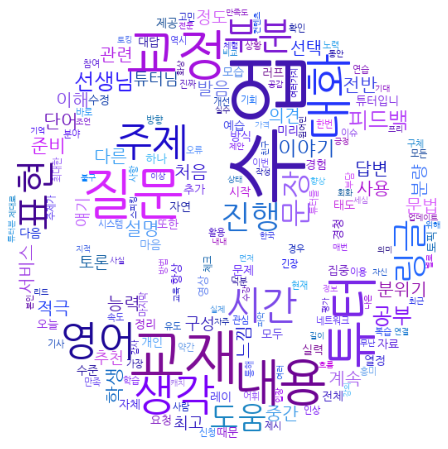

In [351]:
wordcloud = WordCloud(font_path="NanumGothic.ttf",
                     background_color='white',width=800, height=600, color_func = color_func, mask=test, max_font_size=100)
#print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [352]:
wordcloud.to_file(filename="ringle_wordcloud.png")